# **DATASET**


---


## **TELCO CUSTOMER CHURN** - **Exploratory data analysis**



---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtk
import seaborn as sns

%matplotlib inline

### **Loading the dataset**

In [ ]:
dataset = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Dataset initial insights**
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

> **Customers who left within the last month** – the column is called Churn

> **Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

> **Customer account information** – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

> **Demographic info about customers** – gender, age range, and if they have partners and dependents

In [ ]:
print('Shape of dataset: ',dataset.shape)
print('Columns: ',dataset.columns)

Shape of dataset:  (7043, 21)
Columns:  Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


**Dataset contains 7043 records and 21 columns**

### **Description**

In [ ]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### **Analyzing categorical and numerical features**

In [ ]:
categorical = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'
        , 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

numerical = ['tenure','MonthlyCharges','TotalCharges']

# TotalCharges feature is actually a numeric one
dataset.TotalCharges = pd.to_numeric(dataset.TotalCharges,errors='coerce')

*18 categorical features, 3 numerical features*

**Ratio of churn**

Text(0, 0.5, 'Target variable')

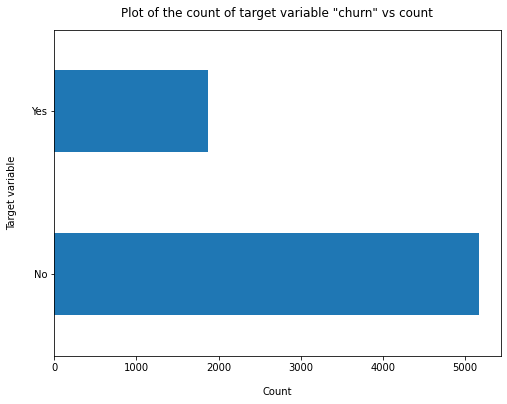

In [ ]:
dataset['Churn'].value_counts().plot(kind='barh',figsize=(8,6))
plt.title('Plot of the count of target variable "churn" vs count',y=1.02)
plt.xlabel('Count',labelpad=14)
plt.ylabel('Target variable',labelpad=14)

In [ ]:
churn = dataset['Churn'].value_counts()
churn_yes = churn['Yes']
churn_no = churn['No']

def churn_precentage(churn_yes,churn_no):
  n = len(dataset['Churn'])
  return 100*(churn_yes/n),100*(churn_no/n)

print(churn_precentage(churn_yes,churn_no))

(26.536987079369588, 73.4630129206304)


**Customers who left: 26.536987079369588%**

**Customers who stayed: 73.4630129206304%**



*   *Imbalanced dataset(Upsampling/downsampling can be performed)*
*   *Category 1(yes) is about 3 times more frequent than category 2(no)*



## **Handling missing values**

In [ ]:
dataset.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**11 missing/null values in TotalCharges column**

In [ ]:
print("Percentage of null values: ",100*11/len(dataset))

Percentage of null values:  0.15618344455487718


In [ ]:
dataset.loc[dataset['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**Since percentage of null values is very less( 0.15618344455487718%), we can drop those records from the dataset**

In [ ]:
dataset.dropna(how='any',inplace=True)
print('New dataset shape: ',dataset.shape)

New dataset shape:  (7032, 21)


**Conversion of numerical feature (tenure) to categorical feature (tenure groups)**

We can divide the tenure range(72 months) into 6 groups of 12 months each

In [ ]:
labels = ['{0} - {1}'.format(i,i+11) for i in range(1,72,12)]
dataset['tenure-group']=pd.cut(dataset.tenure,range(1,80,12),labels=labels,right=False)

dataset['tenure-group'].value_counts()

numerical.pop(0)
categorical.pop(0)
categorical+=['tenure-group']

### **Dropping the irrelevant columns**

In [ ]:
dataset.drop(columns=['customerID','tenure'],axis=1,inplace=True)
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure-group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## **Univariate analysis of telco customer churn dataset**

**An analysis of the various attributes of the dataset with the target variable 'churn' to get insights about the features**

In [ ]:
cols_to_plot=dataset.drop(columns=['Churn','TotalCharges','MonthlyCharges'])

def plot(cols_to_plot):
  for i,predictor in enumerate(cols_to_plot):
    plt.figure(i)
    sns.countplot(data=dataset,x=predictor,hue='Churn')

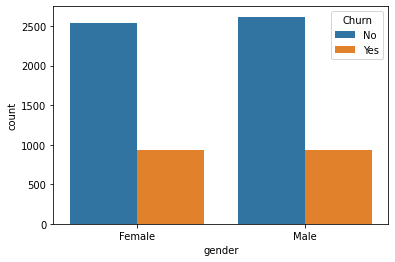

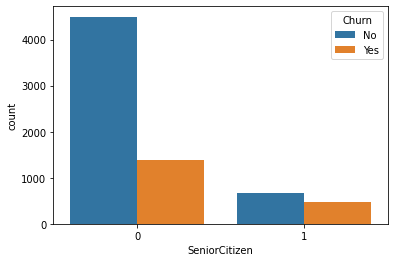

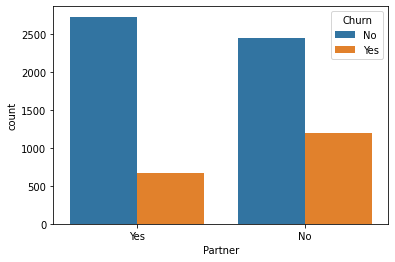

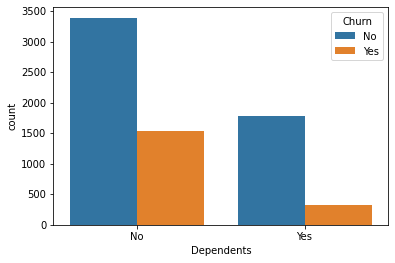

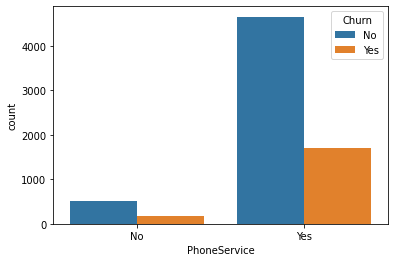

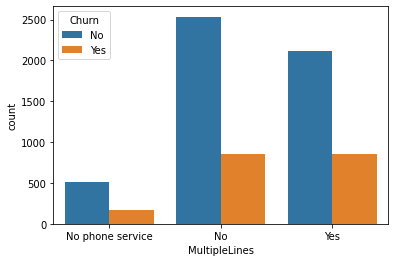

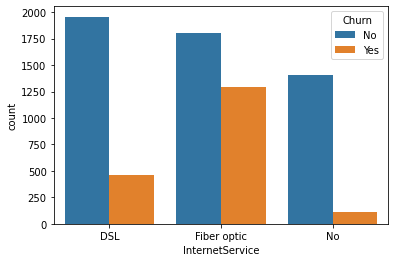

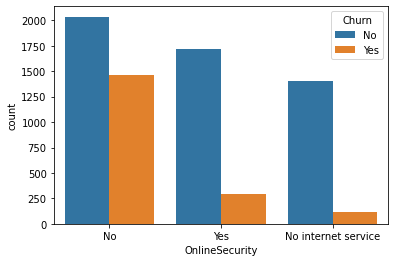

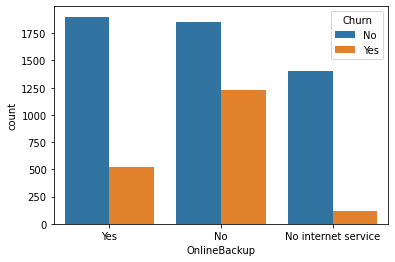

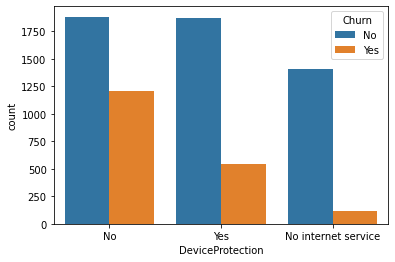

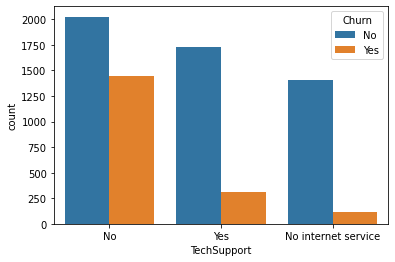

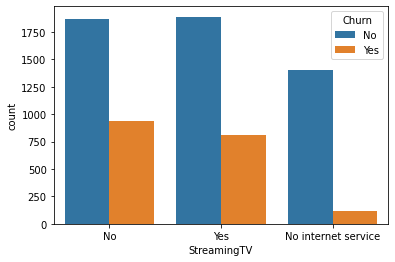

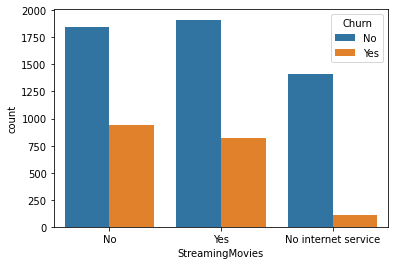

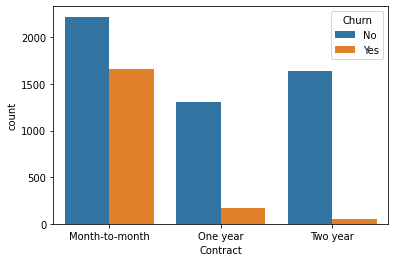

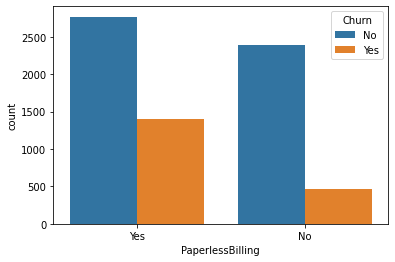

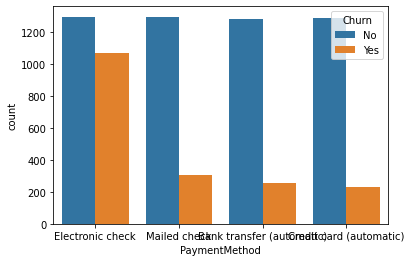

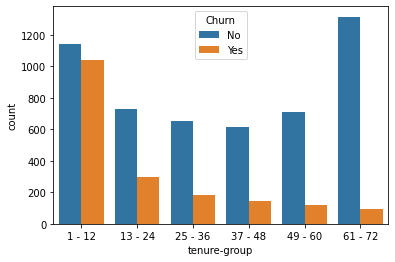

In [ ]:
plot(cols_to_plot)

## **Insights from univariate plot:**


---




*   A large percentage of senior citiziens have churn as 'yes'.
*   A customer with no partner has higher probability to leave.
*   A customer having no dependents has higher probability to leave.
*   A customer with no Internet service has very low probability to leave.
*   A customer with online security, online backup, device protection and tech support has lower probability to leave.
*   A customer with yearly contracts has lower probability to leave.
*   A customer who pays with electronic check has higher probability to leave.
*   A customer in the tenure of 1-12 months has very high probability to leave.















## **One hot encoding og categorical data**

### **Encoding the label 'Churn'**

In [ ]:
dataset['Churn'] = np.where(dataset.Churn=='Yes',1,0)
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure-group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [ ]:
encoded_data = pd.get_dummies(dataset)
encoded_data.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure-group_1 - 12,tenure-group_13 - 24,tenure-group_25 - 36,tenure-group_37 - 48,tenure-group_49 - 60,tenure-group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


### **Plotting churn against monthly and total charges**

In [ ]:
def plot_monthly_charges():
  m = sns.kdeplot(encoded_data.MonthlyCharges[encoded_data['Churn']==0],color='Red',shade=True)
  m = sns.kdeplot(encoded_data.MonthlyCharges[encoded_data['Churn']==1],color='Green',shade=True)
  m.set_ylabel('Density')
  m.set_xlabel('Monthly charges')

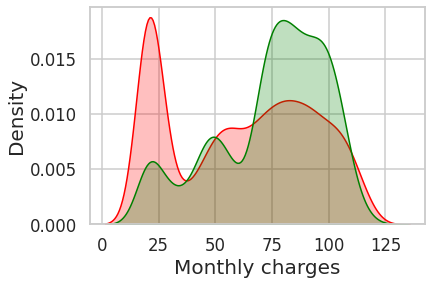

In [ ]:
plot_monthly_charges()

**Higher the monthly charges for customer, higher is the probability of churn**

In [ ]:
def plot_total_charges():
  m = sns.kdeplot(encoded_data.TotalCharges[encoded_data['Churn']==0],color='Red',shade=True)
  m = sns.kdeplot(encoded_data.TotalCharges[encoded_data['Churn']==1],color='Green',shade=True)
  m.set_ylabel('Density')
  m.set_xlabel('Total charges')

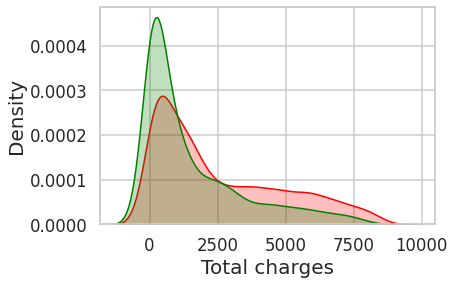

In [ ]:
plot_total_charges()

**Customers leaving are having low total charges**

*Probable reason: Customers are leaving early due to which total cost is less*

Customers having a lower tenure and higher monthly charge will most probably churn and therefore it will result in low total charges

### **Ploting correlation to get most important features**

In [ ]:
def plot_corr():
  plt.figure(figsize=(22,10))
  corr_mat=encoded_data.corr()
  correlations=corr_mat['Churn']
  x=correlations.sort_values(ascending=False)
  x.plot(kind='bar')

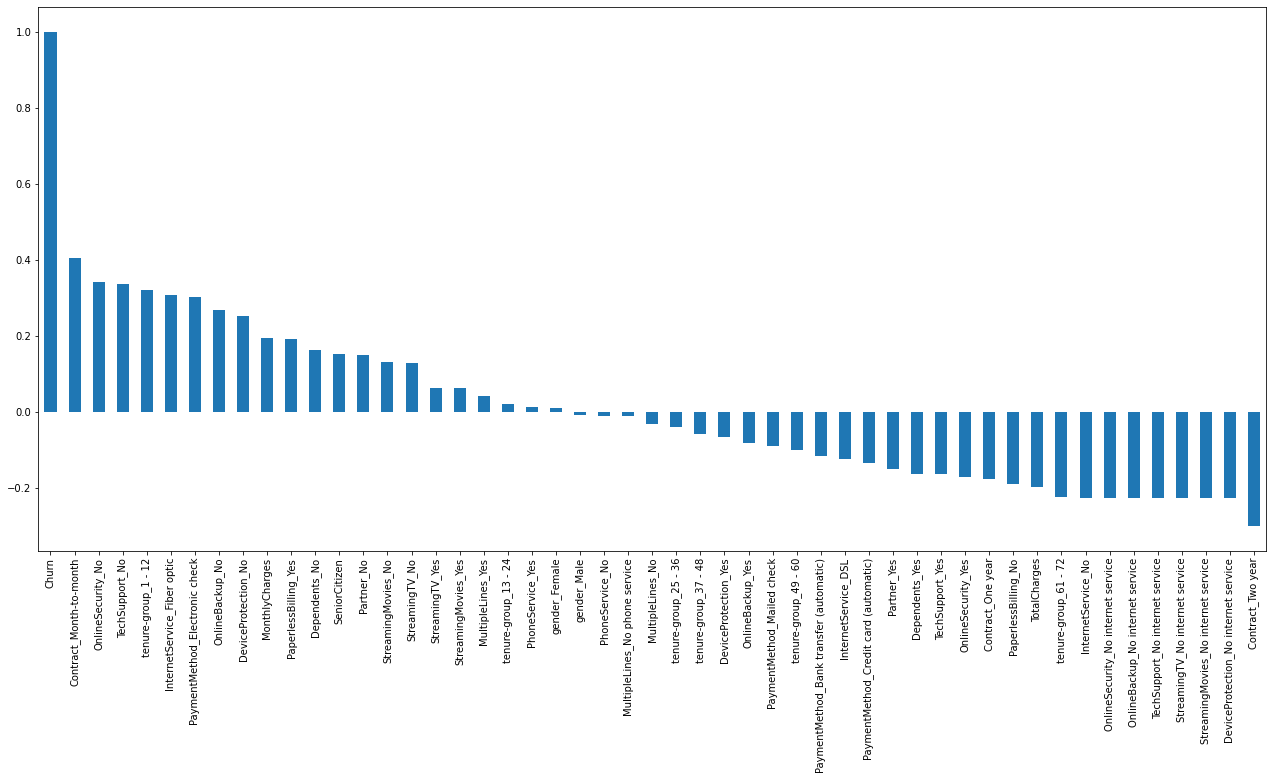

In [ ]:
plot_corr()

**Heatmap**

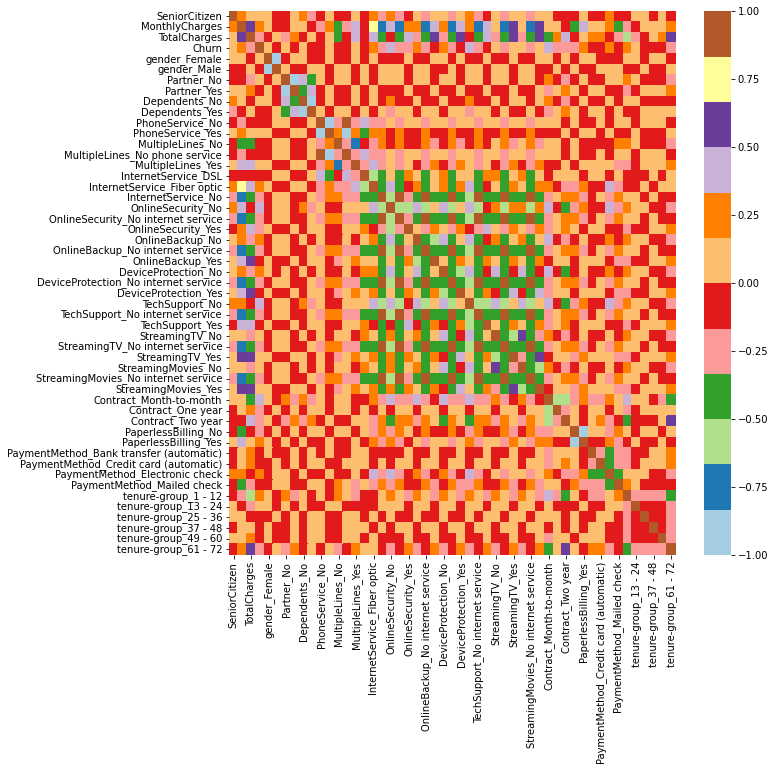

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(encoded_data.corr(),cmap='Paired')

## **Bivariate analysis of telco customer churn dataset**

In [ ]:
def plot_bivariate(df,title,col_name,hue='None'):
  sns.set_style('whitegrid')
  sns.set_context('talk')
  plt.rcParams['axes.labelsize']=20
  plt.rcParams['axes.titlesize']=22
  plt.rcParams['axes.titlepad']=30
  series=pd.Series(data=hue)
  fig,ax=plt.subplots()
  width=len(df[col_name].unique())+4.5*len(series.unique())
  fig.set_size_inches(width,8)
  plt.xticks(rotation=45)
  plt.yscale('log')
  plt.title(title)
  ax=sns.countplot(data=df,x=col_name,order=df[col_name].value_counts().index,hue=hue,palette='bright')
  plt.show()

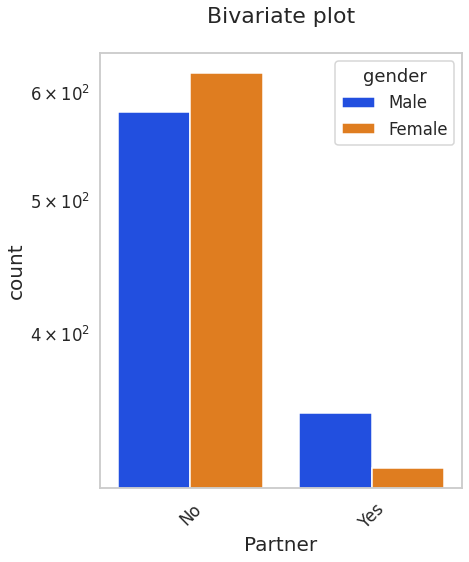

In [ ]:
churn_0 = dataset.loc[encoded_data['Churn']==0]
churn_1 = dataset.loc[encoded_data['Churn']==1]
plot_bivariate(df=churn_1,title='Bivariate plot',col_name='Partner',hue='gender')

In [ ]:
cols_to_plot=dataset.drop(columns=['Churn','TotalCharges','MonthlyCharges'])

def plot_bv_all(cols_to_plot):
  for i,predictor in enumerate(cols_to_plot):
    plt.figure(i)
    plot_bivariate(df=churn_1,title='Bivariate plot',col_name=predictor,hue='gender')

<Figure size 432x288 with 0 Axes>

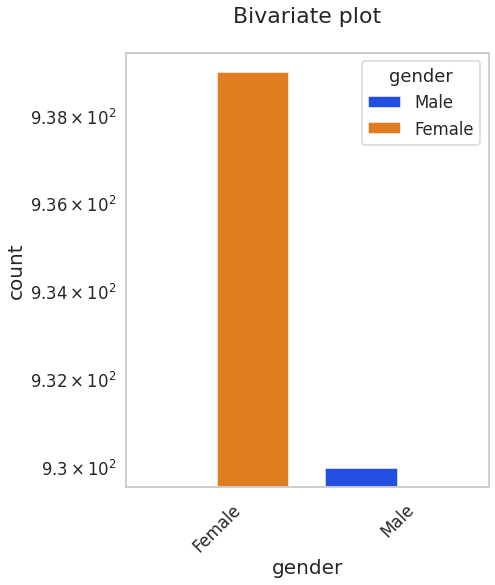

<Figure size 432x288 with 0 Axes>

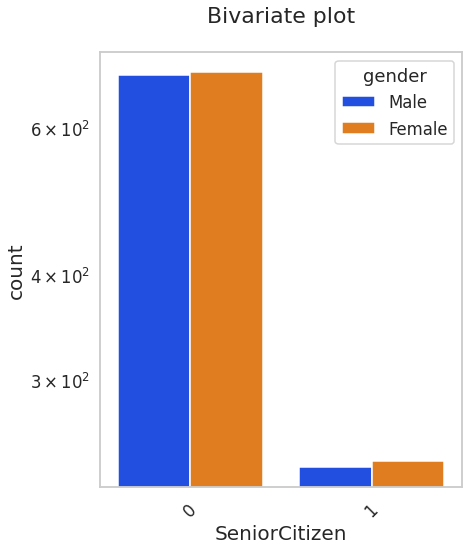

<Figure size 432x288 with 0 Axes>

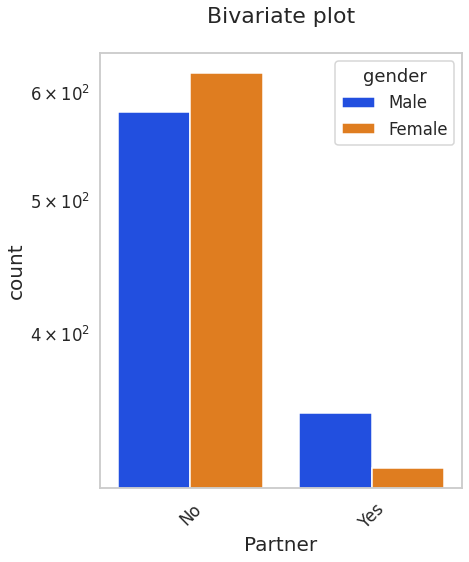

<Figure size 432x288 with 0 Axes>

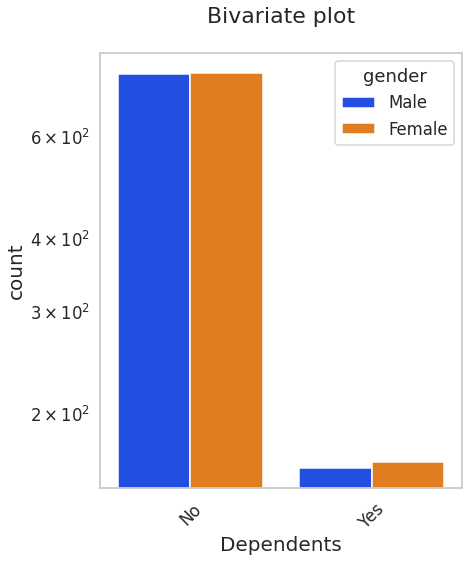

<Figure size 432x288 with 0 Axes>

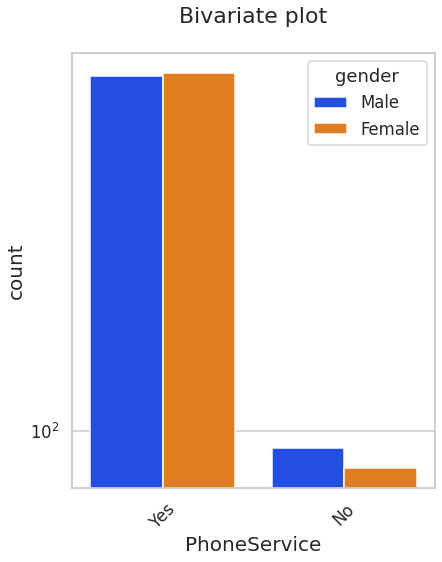

<Figure size 432x288 with 0 Axes>

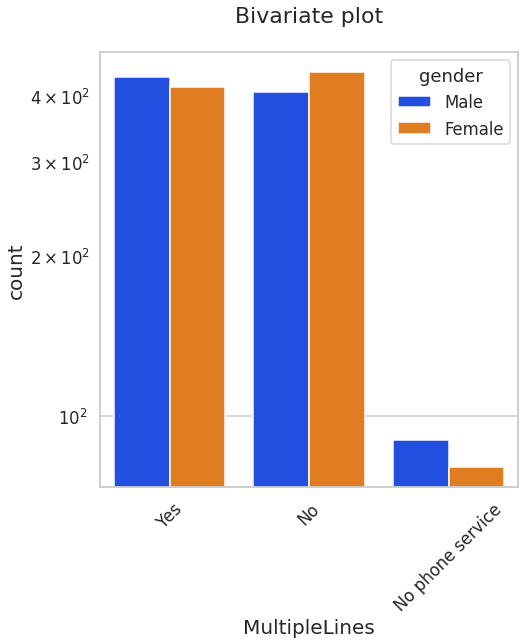

<Figure size 432x288 with 0 Axes>

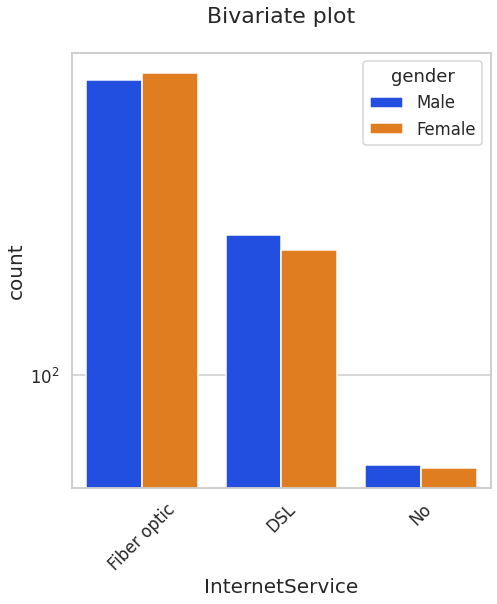

<Figure size 432x288 with 0 Axes>

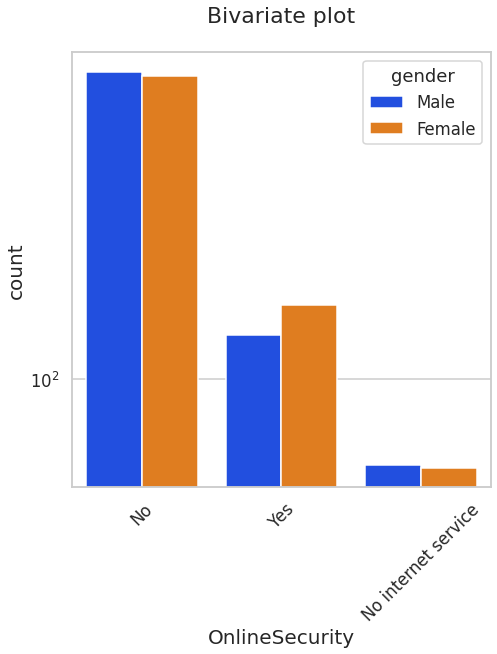

<Figure size 432x288 with 0 Axes>

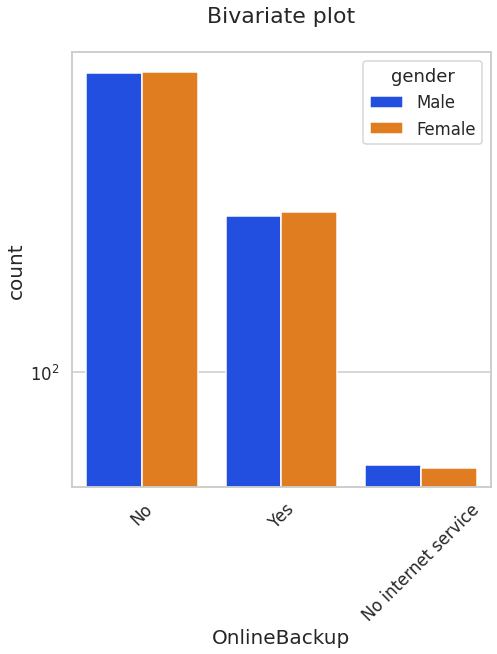

<Figure size 432x288 with 0 Axes>

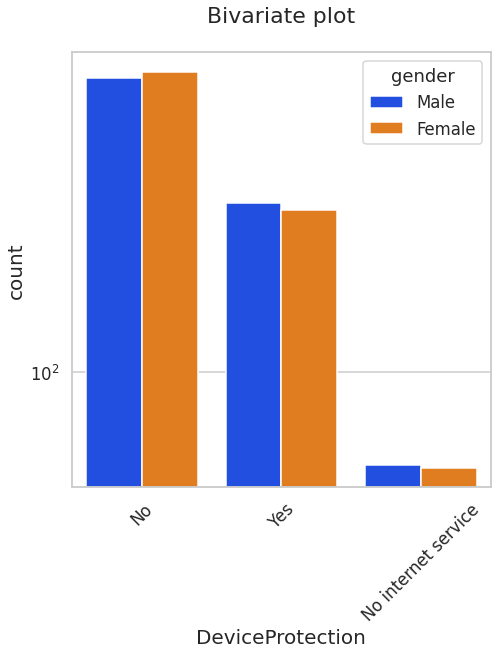

<Figure size 432x288 with 0 Axes>

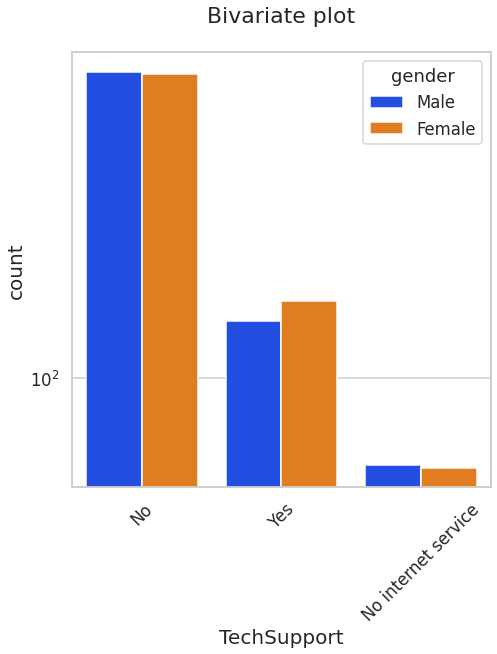

<Figure size 432x288 with 0 Axes>

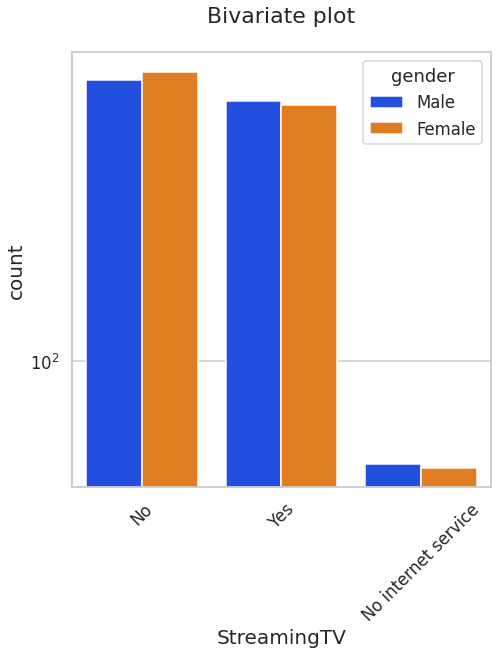

<Figure size 432x288 with 0 Axes>

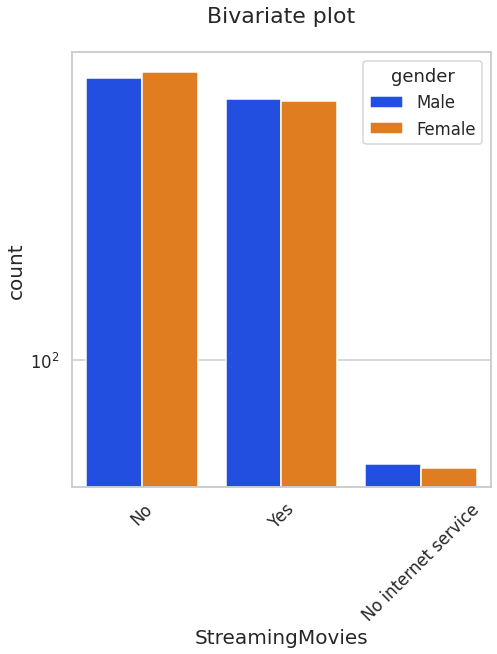

<Figure size 432x288 with 0 Axes>

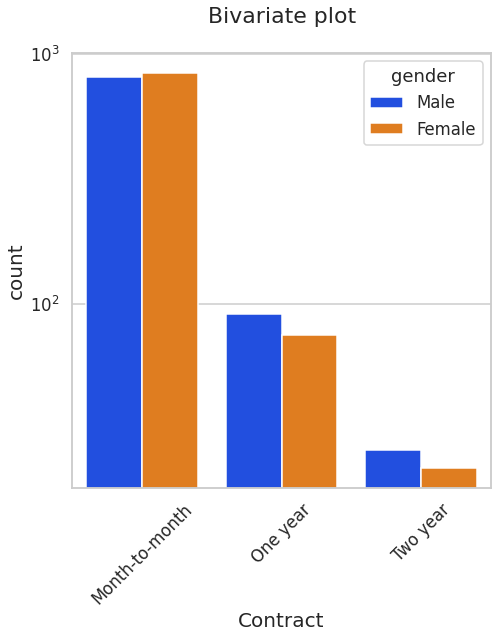

<Figure size 432x288 with 0 Axes>

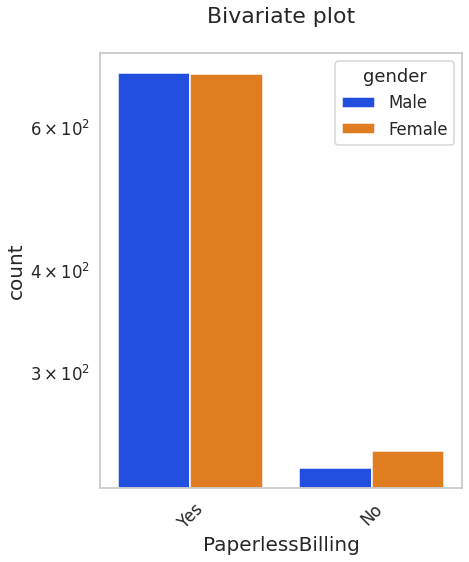

<Figure size 432x288 with 0 Axes>

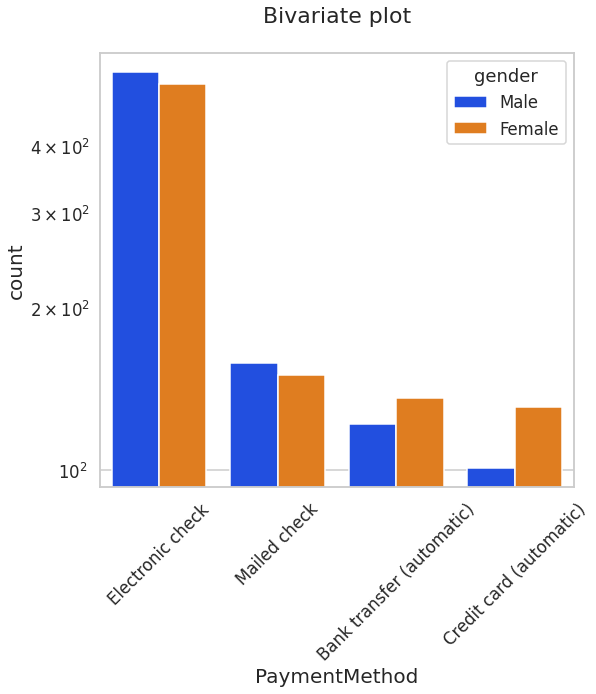

<Figure size 432x288 with 0 Axes>

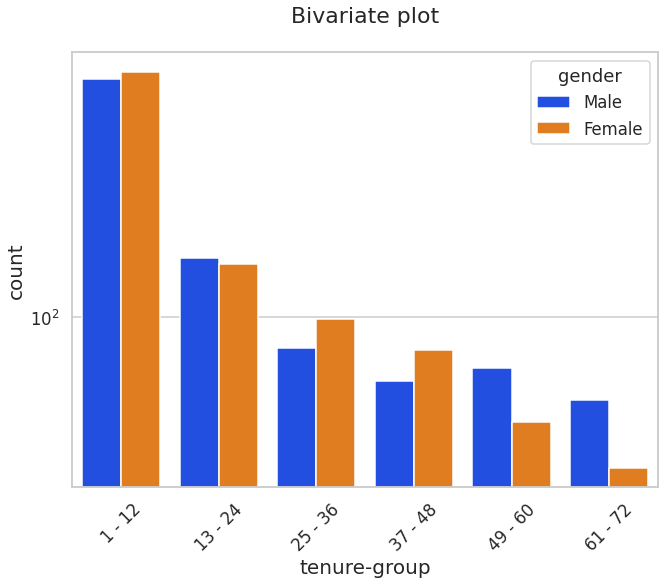

In [ ]:
plot_bv_all(cols_to_plot)

## **FINAL INSIGHTS**


*   A customer with online security, online backup, device protection and tech support has lower probability to leave.
*   A customer who pays with electronic check has highest probability to leave.
*   A customer having no contract on monthly contract has higher probability to churn.





**Storing one hot encoded data in csv file**

In [ ]:
encoded_data.to_csv('telco_churn_data.csv')

In [ ]:
new_data = pd.read_csv('/content/telco_churn_data.csv')
new_data.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure-group_1 - 12,tenure-group_13 - 24,tenure-group_25 - 36,tenure-group_37 - 48,tenure-group_49 - 60,tenure-group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 52 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   int64  
 6   gender_Male                              7032 non-null   int64  
 7   Partner_No                               7032 non-null   int64  
 8   Partner_Yes                              7032 non-null   int64  
 9   Dependents_No                            7032 non-null   int64  
 10  Dependents_Yes                           7032 no